# Our Class Notebook
### Class Examples...

In [16]:
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
arr = np.array([1, 2, 3])
arr

array([1, 2, 3])

In [3]:
arr2 = np.arange(10, 30).reshape((4, 5))
arr2

array([[10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29]])

In [4]:
arr2[0] < 13

array([ True,  True,  True, False, False])

In [5]:
arr2[:, arr2[0] < 13]

array([[10, 11, 12],
       [15, 16, 17],
       [20, 21, 22],
       [25, 26, 27]])

<br><br>
### Using Matplotlib

In [17]:
x = np.arange(1, 11)
y = 10 * np.random.rand(10)
print(x)
print(y)

[ 1  2  3  4  5  6  7  8  9 10]
[8.45656254 8.49460376 8.83250415 3.55624784 3.67547852 1.18576819
 7.23243851 1.28718247 3.46818418 6.09496132]


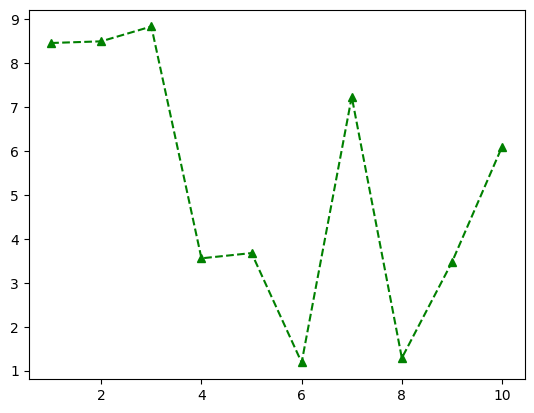

In [25]:
plt.plot(x, y, 'g^--');

$$E = \frac{mc^2}{\sqrt{1-\frac{v^2}{c^2}}}$$

<br><br>
## Task 5-1

In [6]:
def read_data(filename: str) -> list[tuple]:
    data = []
    with open(filename, encoding='utf-8') as f:
        f.readline()
        for line in f:
            city, state, year, population = line.strip().split(',')
            data.append((city, state, int(year), int(population)))
    return data

In [7]:
filename = 'resources/population_data.csv'

In [8]:
results = read_data(filename)
results

[('Colorado Springs', 'CO', 2020, 485946),
 ('Raleigh', 'NC', 2020, 481958),
 ('Honolulu', 'HI', 2020, 342933),
 ('Anchorage', 'AK', 2010, 293310),
 ('Newark', 'NJ', 2010, 277158)]

<br><br>

## Task 5-2

In [9]:
populations = np.array(results, dtype=object)
populations

array([['Colorado Springs', 'CO', 2020, 485946],
       ['Raleigh', 'NC', 2020, 481958],
       ['Honolulu', 'HI', 2020, 342933],
       ['Anchorage', 'AK', 2010, 293310],
       ['Newark', 'NJ', 2010, 277158]], dtype=object)

Question 1...

In [10]:
populations.shape

(5, 4)

In [11]:
populations.size, populations.ndim

(20, 2)

Question 2...

In [12]:
populations[:, -1].mean()

376261.0

Question 3...

In [13]:
mask = populations[:, 2] == 2020
len(populations[mask])

3

Question 4...

In [14]:
mask = populations[:, -1] > 350_000
populations[mask]

array([['Colorado Springs', 'CO', 2020, 485946],
       ['Raleigh', 'NC', 2020, 481958]], dtype=object)

<br><br>

## Task 5-4

In [28]:
x = populations[:, 0]
height = populations[:, -1]

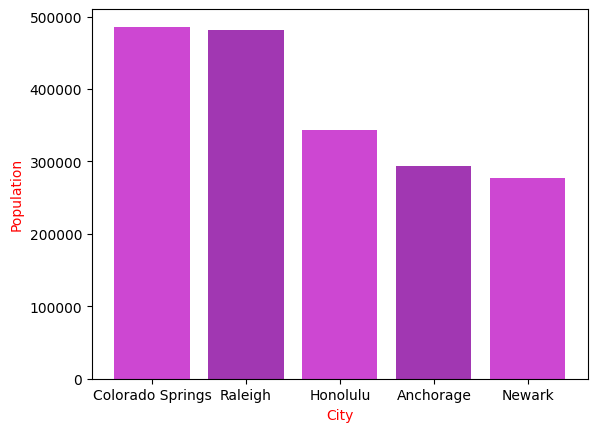

In [33]:
plt.bar(x=x, height=height, color=['#cd47d2', '#a137b2'])
plt.xlabel('City', color='red')
plt.ylabel('Population', color='red');

<br><br>
# Using Pandas with a a log file

In [36]:
log = pd.read_csv('resources/new_access.log', sep='\s+', usecols=[0, 3, 5, 6, 7, 9],
                  names=['addr', 'req_date', 'path', 'status', 'size', 'browser'], low_memory=False)
log.shape

(463915, 6)

In [37]:
log.head()

,addr,req_date,path,status,size,browser
0,109.169.248.247,[12/Dec/2015:18:25:11,GET /administrator/ HTTP/1.1,200,4263,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...
1,109.169.248.247,[12/Dec/2015:18:25:11,POST /administrator/index.php HTTP/1.1,200,4494,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...
2,46.72.177.4,[12/Dec/2015:18:31:08,GET /administrator/ HTTP/1.1,200,4263,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...
3,46.72.177.4,[12/Dec/2015:18:31:08,POST /administrator/index.php HTTP/1.1,200,4494,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...
4,83.167.113.100,[12/Dec/2015:18:31:25,GET /administrator/ HTTP/1.1,200,4263,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...


In [38]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463915 entries, 0 to 463914
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   addr      463915 non-null  object
 1   req_date  463915 non-null  object
 2   path      463915 non-null  object
 3   status    463915 non-null  int64 
 4   size      463914 non-null  object
 5   browser   463860 non-null  object
dtypes: int64(1), object(5)
memory usage: 21.2+ MB


In [39]:
log.status.unique()

array([200, 404, 500, 405, 301, 304, 501, 206, 403, 303, 412, 400],
      dtype=int64)

In [40]:
log.status.value_counts()

status
200    429216
404     29687
304      2517
206      1689
301       382
500       359
303        25
403        19
405        15
412         4
501         1
400         1
Name: count, dtype: int64

In [42]:
pd.isnull(log).sum()

addr         0
req_date     0
path         0
status       0
size         1
browser     55
dtype: int64

In [43]:
log.req_date = pd.to_datetime(log.req_date, format='[%d/%b/%Y:%H:%M:%S')

In [44]:
log.head()

,addr,req_date,path,status,size,browser
0,109.169.248.247,2015-12-12 18:25:11,GET /administrator/ HTTP/1.1,200,4263,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...
1,109.169.248.247,2015-12-12 18:25:11,POST /administrator/index.php HTTP/1.1,200,4494,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...
2,46.72.177.4,2015-12-12 18:31:08,GET /administrator/ HTTP/1.1,200,4263,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...
3,46.72.177.4,2015-12-12 18:31:08,POST /administrator/index.php HTTP/1.1,200,4494,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...
4,83.167.113.100,2015-12-12 18:31:25,GET /administrator/ HTTP/1.1,200,4263,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...


In [45]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463915 entries, 0 to 463914
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   addr      463915 non-null  object        
 1   req_date  463915 non-null  datetime64[ns]
 2   path      463915 non-null  object        
 3   status    463915 non-null  int64         
 4   size      463914 non-null  object        
 5   browser   463860 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 21.2+ MB


In [49]:
top10_addrs = log.groupby('addr').size().sort_values(ascending=False).head(10)
top10_addrs

addr
149.56.83.40       62178
205.167.170.15     33302
134.249.53.185     17904
192.227.172.158    13474
195.154.216.79     10996
195.154.215.241     7705
41.75.96.130        5664
190.57.154.101      5662
154.0.14.250        5659
37.1.206.196        3780
dtype: int64

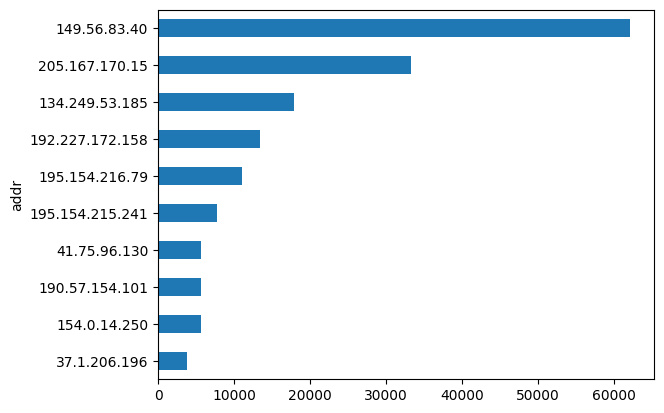

In [52]:
top10_addrs[::-1].plot(kind='barh');

In [53]:
log.groupby('addr').size().nlargest(10)

addr
149.56.83.40       62178
205.167.170.15     33302
134.249.53.185     17904
192.227.172.158    13474
195.154.216.79     10996
195.154.215.241     7705
41.75.96.130        5664
190.57.154.101      5662
154.0.14.250        5659
37.1.206.196        3780
dtype: int64

In [54]:
log['method'] = log.path.apply(lambda cell: cell.split()[0])
log.head()

,addr,req_date,path,status,size,browser,method
0,109.169.248.247,2015-12-12 18:25:11,GET /administrator/ HTTP/1.1,200,4263,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,GET
1,109.169.248.247,2015-12-12 18:25:11,POST /administrator/index.php HTTP/1.1,200,4494,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,POST
2,46.72.177.4,2015-12-12 18:31:08,GET /administrator/ HTTP/1.1,200,4263,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,GET
3,46.72.177.4,2015-12-12 18:31:08,POST /administrator/index.php HTTP/1.1,200,4494,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,POST
4,83.167.113.100,2015-12-12 18:31:25,GET /administrator/ HTTP/1.1,200,4263,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,GET


In [55]:
mask = log.method == 'POST'
top10_posts = log[mask].groupby('addr').size().nlargest(10)
top10_posts

addr
149.56.83.40       62177
192.227.172.158     6731
134.249.53.185      5968
41.75.96.130        5664
190.57.154.101      5662
154.0.14.250        5659
78.186.191.187      2840
200.148.166.42      2829
41.134.79.41        2719
158.69.186.125      2322
dtype: int64

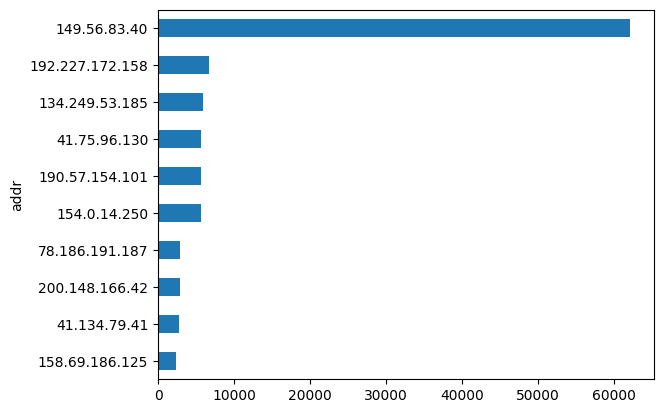

In [57]:
top10_posts[::-1].plot(kind='barh');

In [58]:
!! pip install pygeoip

['Requirement already satisfied: pygeoip in .\\venv311\\lib\\site-packages (0.3.2)',
 '',
 '[notice] A new release of pip is available: 23.2.1 -> 23.3.1',
 '[notice] To update, run: python.exe -m pip install --upgrade pip']

In [59]:
import pygeoip
GEOIP = pygeoip.GeoIP('resources/GeoLiteCity.dat')
GEOIP.record_by_addr('149.56.83.40')

{'dma_code': 0,
 'area_code': 0,
 'metro_code': None,
 'postal_code': 'H3A',
 'country_code': 'CA',
 'country_code3': 'CAN',
 'country_name': 'Canada',
 'continent': 'NA',
 'region_code': 'QC',
 'city': 'Montréal',
 'latitude': 45.50399999999999,
 'longitude': -73.5747,
 'time_zone': 'America/Montreal'}

In [60]:
def get_location(addr):
    results = ['', '', 0, 0]
    try:
        info = GEOIP.record_by_addr(addr)
        if info:
            results = [info.get('country_name'), info.get('city'), info.get('latitude'), info.get('longitude')]
    except pygeoip.GeoIPError:
        pass
    
    return results

In [61]:
results = log.addr.map(get_location)

In [62]:
locations = pd.DataFrame(results.to_numpy().tolist(), columns=['country', 'city', 'latitude', 'longitude'])

In [63]:
locations.head()

,country,city,latitude,longitude
0,Russian Federation,Chapaevsk,52.9781,49.7197
1,Russian Federation,Chapaevsk,52.9781,49.7197
2,Russian Federation,Kursk,51.8830,36.2659
3,Russian Federation,Kursk,51.8830,36.2659
4,Russian Federation,Moscow,55.7522,37.6156


In [64]:
merged = pd.concat([log, locations], axis=1)
merged.head()

,addr,req_date,path,status,size,browser,method,country,city,latitude,longitude
0,109.169.248.247,2015-12-12 18:25:11,GET /administrator/ HTTP/1.1,200,4263,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,GET,Russian Federation,Chapaevsk,52.9781,49.7197
1,109.169.248.247,2015-12-12 18:25:11,POST /administrator/index.php HTTP/1.1,200,4494,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,POST,Russian Federation,Chapaevsk,52.9781,49.7197
2,46.72.177.4,2015-12-12 18:31:08,GET /administrator/ HTTP/1.1,200,4263,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,GET,Russian Federation,Kursk,51.8830,36.2659
3,46.72.177.4,2015-12-12 18:31:08,POST /administrator/index.php HTTP/1.1,200,4494,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,POST,Russian Federation,Kursk,51.8830,36.2659
4,83.167.113.100,2015-12-12 18:31:25,GET /administrator/ HTTP/1.1,200,4263,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,GET,Russian Federation,Moscow,55.7522,37.6156


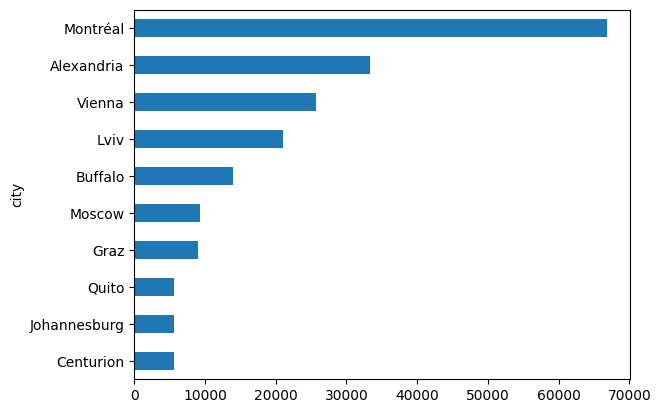

In [66]:
top10_cities = merged.groupby('city').size().nlargest(10)
top10_cities[::-1].plot(kind='barh');

In [67]:
!! pip install gmplot

['Requirement already satisfied: gmplot in .\\venv311\\lib\\site-packages (1.4.1)',
 'Requirement already satisfied: requests in .\\venv311\\lib\\site-packages (from gmplot) (2.31.0)',
 'Requirement already satisfied: charset-normalizer<4,>=2 in .\\venv311\\lib\\site-packages (from requests->gmplot) (3.3.2)',
 'Requirement already satisfied: idna<4,>=2.5 in .\\venv311\\lib\\site-packages (from requests->gmplot) (3.4)',
 'Requirement already satisfied: urllib3<3,>=1.21.1 in .\\venv311\\lib\\site-packages (from requests->gmplot) (2.1.0)',
 'Requirement already satisfied: certifi>=2017.4.17 in .\\venv311\\lib\\site-packages (from requests->gmplot) (2023.7.22)',
 '',
 '[notice] A new release of pip is available: 23.2.1 -> 23.3.1',
 '[notice] To update, run: python.exe -m pip install --upgrade pip']

In [68]:
from gmplot import GoogleMapPlotter

lats, longs = [], []
for city in top10_cities.index:
    latitude = merged.loc[city == merged['city'], 'latitude']
    longitude = merged.loc[city == merged['city'], 'longitude']
    lats.append(latitude.iloc[0])
    longs.append(longitude.iloc[0])

g_map = GoogleMapPlotter(37, 95, 3)
g_map.heatmap(lats, longs, radius=20)
g_map.draw('results.html')